Добавляем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Добавляем функцию для системы массы - пружины - демпфера

In [2]:
def mass_spring_system(state:list):

    x, dx = state
    b = 0.015
    m = 0.6 
    k = 19.8
    ddx = - 1/m * (b*dx + k*x)
    return np.array([dx, ddx])

Добавляем функцию для аналитического решения 

In [3]:
def x_analytical(t):
    C1 = 0.57
    C2 = 0.00124
    w_0 = 5.7445
    ksi = 0.00217 
    return np.exp(-1 * ksi * w_0 * t) * (C1 * np.cos(w_0*t) + C2 * np.sin(w_0*t))

Добавляем функции методов расчета

In [4]:
def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t

Расчет численных методов

In [5]:
x0 = np.array([0.57, 0.0])  # Начальные условия: [положение, скорость]
Tf = 10.0
h = 0.01

# Forward Euler
x_fe, t_fe = forward_euler(mass_spring_system, x0, Tf, h)

# Backward Euler  
x_be, t_be = backward_euler(mass_spring_system, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(mass_spring_system, x0, Tf, h)

Расчет аналитического решения

In [6]:
t = t_fe
x_a = x_analytical(t)

Выводим сравнительные графики методов

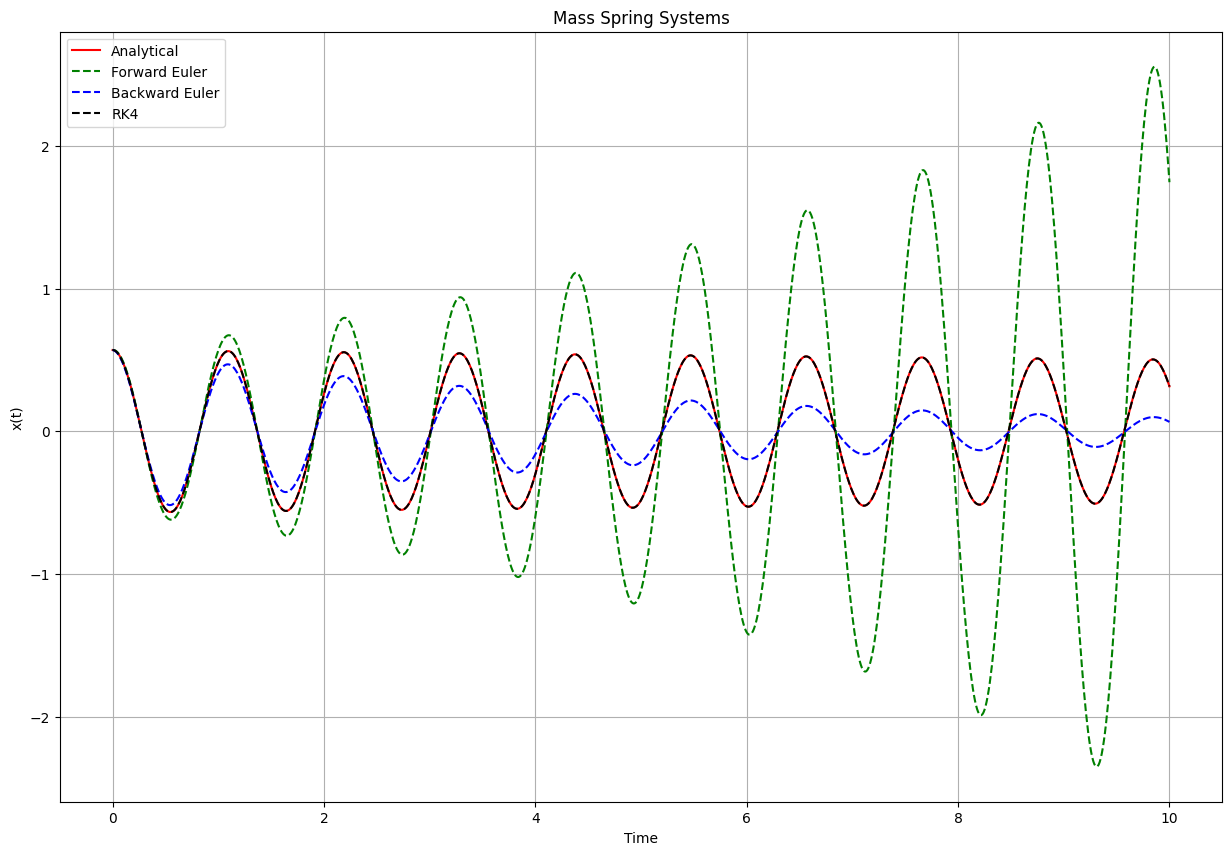

In [7]:
# Plot results
plt.figure(figsize=(15, 10))
plt.title('Mass Spring Systems')
plt.plot(t, x_a, 'r-', label='Analytical')
plt.plot(t_fe, x_fe[0], 'g--', label='Forward Euler')
plt.plot(t_be, x_be[0], 'b--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[0], 'k--', label='RK4')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()